# 과대적합과 과소적합

## Import

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

## Load IMDB dataset

In [3]:
NUM_WORDS = 1000
(train_data, `train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)
len(train_data), len(test_data)

(25000, 25000)

In [9]:
len(train_data[0]), len(train_data[1]), train_data[0]

(218,
 189,
 [1,
  14,
  22,
  16,
  43,
  530,
  973,
  2,
  2,
  65,
  458,
  2,
  66,
  2,
  4,
  173,
  36,
  256,
  5,
  25,
  100,
  43,
  838,
  112,
  50,
  670,
  2,
  9,
  35,
  480,
  284,
  5,
  150,
  4,
  172,
  112,
  167,
  2,
  336,
  385,
  39,
  4,
  172,
  2,
  2,
  17,
  546,
  38,
  13,
  447,
  4,
  192,
  50,
  16,
  6,
  147,
  2,
  19,
  14,
  22,
  4,
  2,
  2,
  469,
  4,
  22,
  71,
  87,
  12,
  16,
  43,
  530,
  38,
  76,
  15,
  13,
  2,
  4,
  22,
  17,
  515,
  17,
  12,
  16,
  626,
  18,
  2,
  5,
  62,
  386,
  12,
  8,
  316,
  8,
  106,
  5,
  4,
  2,
  2,
  16,
  480,
  66,
  2,
  33,
  4,
  130,
  12,
  16,
  38,
  619,
  5,
  25,
  124,
  51,
  36,
  135,
  48,
  25,
  2,
  33,
  6,
  22,
  12,
  215,
  28,
  77,
  52,
  5,
  14,
  407,
  16,
  82,
  2,
  8,
  4,
  107,
  117,
  2,
  15,
  256,
  4,
  2,
  7,
  2,
  5,
  723,
  36,
  71,
  43,
  530,
  476,
  26,
  400,
  317,
  46,
  7,
  4,
  2,
  2,
  13,
  104,
  88,
  4,
  381,
  15,
  29

In [5]:
def multi_hot_sequences(sequences, dimension):
    # 0으로 채워진 (len(sequences), dimension) 크기의 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # results[i]의 특정 인덱스만 1로 설정합니다
    return results

In [10]:
train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)
len(train_data), len(test_data)

(25000, 25000)

In [13]:
len(train_data[0]), len(train_data[1]), train_data[0]

(1000,
 1000,
 array([0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
        1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1.,
        0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
        1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
        0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
        0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.

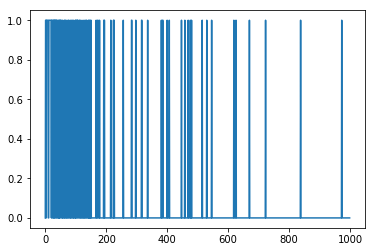

In [15]:
plt.plot(train_data[0])

## Baseline model

In [18]:
baseline_model = keras.Sequential([
    keras.layers.Dense(16, activation="relu", input_shape=(NUM_WORDS, )),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

In [19]:
baseline_model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy", "binary_crossentropy"]
)

In [20]:
baseline_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                16016     
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 16,305
Trainable params: 16,305
Non-trainable params: 0
_________________________________________________________________


In [21]:
baseline_history = baseline_model.fit(
    train_data,
    train_labels,
    epochs=20,
    batch_size=512,
    validation_data=(test_data, test_labels),
    verbose=2
)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 1s - loss: 0.5814 - accuracy: 0.7168 - binary_crossentropy: 0.5814 - val_loss: 0.4485 - val_accuracy: 0.8187 - val_binary_crossentropy: 0.4485
Epoch 2/20
25000/25000 - 0s - loss: 0.3775 - accuracy: 0.8476 - binary_crossentropy: 0.3775 - val_loss: 0.3458 - val_accuracy: 0.8539 - val_binary_crossentropy: 0.3458
Epoch 3/20
25000/25000 - 0s - loss: 0.3241 - accuracy: 0.8654 - binary_crossentropy: 0.3241 - val_loss: 0.3322 - val_accuracy: 0.8595 - val_binary_crossentropy: 0.3322
Epoch 4/20
25000/25000 - 0s - loss: 0.3082 - accuracy: 0.8729 - binary_crossentropy: 0.3082 - val_loss: 0.3280 - val_accuracy: 0.8603 - val_binary_crossentropy: 0.3280
Epoch 5/20
25000/25000 - 0s - loss: 0.3007 - accuracy: 0.8760 - binary_crossentropy: 0.3007 - val_loss: 0.3272 - val_accuracy: 0.8602 - val_binary_crossentropy: 0.3272
Epoch 6/20
25000/25000 - 0s - loss: 0.2955 - accuracy: 0.8794 - binary_crossentropy: 0.2955 - val_loss: 0.3284

## Small model

In [23]:
small_model = keras.Sequential([
    keras.layers.Dense(4, activation="relu", input_shape=(NUM_WORDS, )),
    keras.layers.Dense(4, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid"),
])

In [24]:
small_model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy", "binary_crossentropy"]
)

In [25]:
small_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 4)                 4004      
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 5         
Total params: 4,029
Trainable params: 4,029
Non-trainable params: 0
_________________________________________________________________


In [26]:
small_history = small_model.fit(
    train_data,
    train_labels,
    epochs=20,
    batch_size=512,
    validation_data=(test_data, test_labels),
    verbose=2
)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 1s - loss: 0.6628 - accuracy: 0.5913 - binary_crossentropy: 0.6628 - val_loss: 0.6183 - val_accuracy: 0.6655 - val_binary_crossentropy: 0.6183
Epoch 2/20
25000/25000 - 0s - loss: 0.5754 - accuracy: 0.7368 - binary_crossentropy: 0.5754 - val_loss: 0.5447 - val_accuracy: 0.7611 - val_binary_crossentropy: 0.5447
Epoch 3/20
25000/25000 - 0s - loss: 0.5148 - accuracy: 0.8101 - binary_crossentropy: 0.5148 - val_loss: 0.4993 - val_accuracy: 0.8197 - val_binary_crossentropy: 0.4993
Epoch 4/20
25000/25000 - 0s - loss: 0.4657 - accuracy: 0.8446 - binary_crossentropy: 0.4657 - val_loss: 0.4006 - val_accuracy: 0.8440 - val_binary_crossentropy: 0.4006
Epoch 5/20
25000/25000 - 0s - loss: 0.3492 - accuracy: 0.8611 - binary_crossentropy: 0.3492 - val_loss: 0.3406 - val_accuracy: 0.8572 - val_binary_crossentropy: 0.3406
Epoch 6/20
25000/25000 - 0s - loss: 0.3187 - accuracy: 0.8703 - binary_crossentropy: 0.3187 - val_loss: 0.3307

## big model

In [27]:
big_model = keras.Sequential([
    keras.layers.Dense(512, activation="relu", input_shape=(NUM_WORDS, )),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid"),
])

In [28]:
big_model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy", "binary_crossentropy"]
)

In [29]:
big_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               512512    
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 513       
Total params: 775,681
Trainable params: 775,681
Non-trainable params: 0
_________________________________________________________________


In [30]:
big_history = big_model.fit(
    train_data,
    train_labels,
    epochs=20,
    batch_size=512,
    validation_data=(test_data, test_labels),
    verbose=2
)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 1s - loss: 0.4091 - accuracy: 0.8173 - binary_crossentropy: 0.4091 - val_loss: 0.3586 - val_accuracy: 0.8424 - val_binary_crossentropy: 0.3586
Epoch 2/20
25000/25000 - 1s - loss: 0.2908 - accuracy: 0.8805 - binary_crossentropy: 0.2908 - val_loss: 0.3305 - val_accuracy: 0.8568 - val_binary_crossentropy: 0.3305
Epoch 3/20
25000/25000 - 1s - loss: 0.2241 - accuracy: 0.9120 - binary_crossentropy: 0.2241 - val_loss: 0.3423 - val_accuracy: 0.8543 - val_binary_crossentropy: 0.3423
Epoch 4/20
25000/25000 - 1s - loss: 0.1108 - accuracy: 0.9650 - binary_crossentropy: 0.1108 - val_loss: 0.4538 - val_accuracy: 0.8394 - val_binary_crossentropy: 0.4538
Epoch 5/20
25000/25000 - 1s - loss: 0.0312 - accuracy: 0.9939 - binary_crossentropy: 0.0312 - val_loss: 0.5273 - val_accuracy: 0.8456 - val_binary_crossentropy: 0.5273
Epoch 6/20
25000/25000 - 1s - loss: 0.0065 - accuracy: 0.9996 - binary_crossentropy: 0.0065 - val_loss: 0.6031

## Visualization

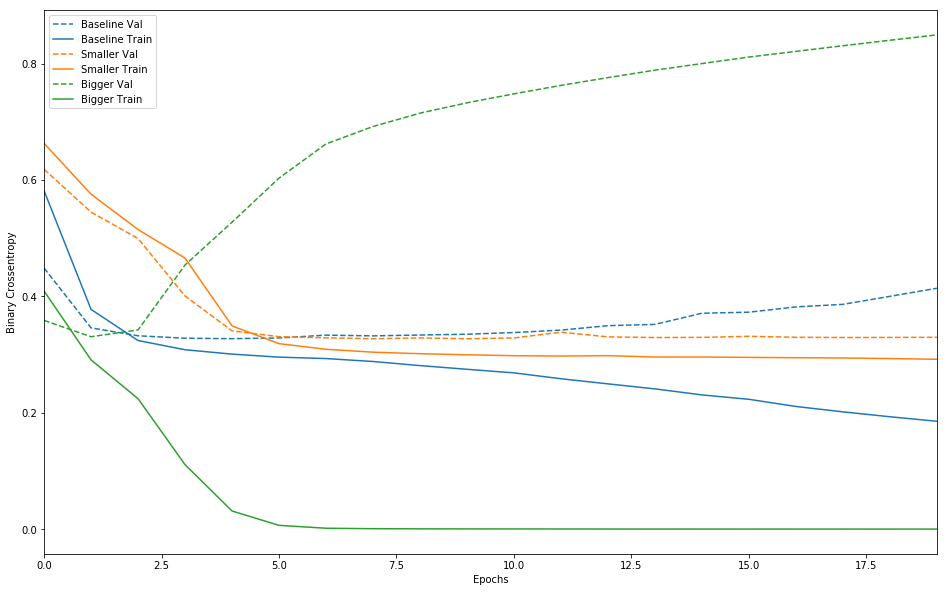

In [32]:
def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(16,10))

    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

    plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', small_history),
              ('bigger', big_history)])

## Add wighted regularization

In [34]:
l2_model = keras.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001), activation="relu", input_shape=(NUM_WORDS, )),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001), activation="relu"),
    keras.layers.Dense(1, activation='sigmoid')
])

In [35]:
l2_model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy", "binary_crossentropy"]
)

In [36]:
l2_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 16)                16016     
_________________________________________________________________
dense_14 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 17        
Total params: 16,305
Trainable params: 16,305
Non-trainable params: 0
_________________________________________________________________


In [37]:
l2_history = l2_model.fit(
    train_data, 
    train_labels,
    epochs=20,
    batch_size=512,
    validation_data=(test_data, test_labels),
    verbose=2
)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 1s - loss: 0.6390 - accuracy: 0.7072 - binary_crossentropy: 0.5970 - val_loss: 0.5085 - val_accuracy: 0.8157 - val_binary_crossentropy: 0.4691
Epoch 2/20
25000/25000 - 0s - loss: 0.4321 - accuracy: 0.8432 - binary_crossentropy: 0.3924 - val_loss: 0.3924 - val_accuracy: 0.8544 - val_binary_crossentropy: 0.3528
Epoch 3/20
25000/25000 - 0s - loss: 0.3677 - accuracy: 0.8642 - binary_crossentropy: 0.3287 - val_loss: 0.3756 - val_accuracy: 0.8584 - val_binary_crossentropy: 0.3374
Epoch 4/20
25000/25000 - 0s - loss: 0.3494 - accuracy: 0.8716 - binary_crossentropy: 0.3120 - val_loss: 0.3654 - val_accuracy: 0.8613 - val_binary_crossentropy: 0.3290
Epoch 5/20
25000/25000 - 0s - loss: 0.3414 - accuracy: 0.8747 - binary_crossentropy: 0.3058 - val_loss: 0.3620 - val_accuracy: 0.8614 - val_binary_crossentropy: 0.3273
Epoch 6/20
25000/25000 - 0s - loss: 0.3379 - accuracy: 0.8742 - binary_crossentropy: 0.3038 - val_loss: 0.3616

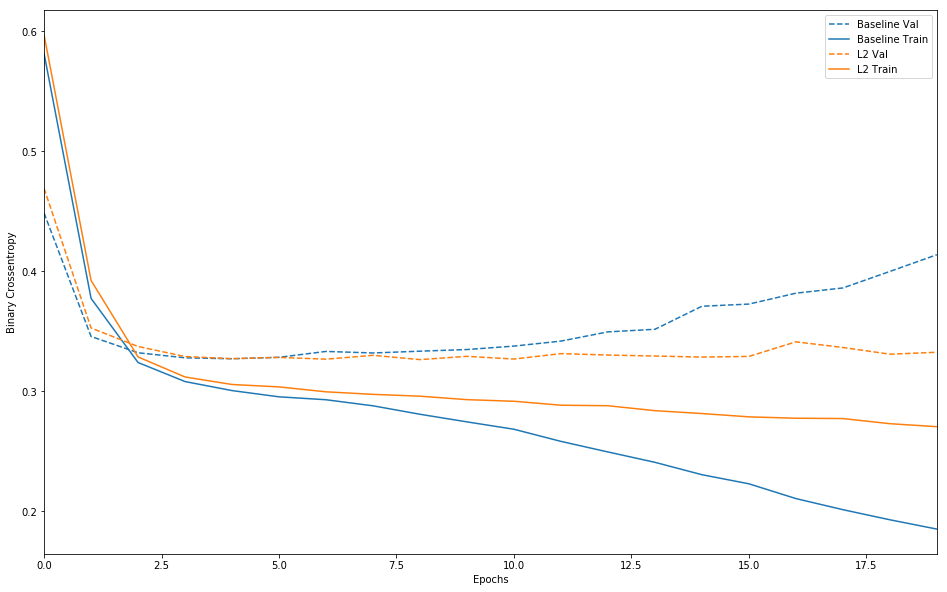

In [38]:
plot_history([('baseline', baseline_history),
              ('l2', l2_history)])

## Add dropout
드롭아웃(dropout)은 신경망에서 가장 효과적이고 널리 사용하는 규제 기법 중 하나입니다. 토론토(Toronto) 대학의 힌튼(Hinton)과 그의 제자들이 개발했습니다. 드롭아웃을 층에 적용하면 훈련하는 동안 층의 출력 특성을 랜덤하게 끕니다(즉, 0으로 만듭니다). 훈련하는 동안 어떤 입력 샘플에 대해 [0.2, 0.5, 1.3, 0.8, 1.1] 벡터를 출력하는 층이 있다고 가정해 보죠. 드롭아웃을 적용하면 이 벡터에서 몇 개의 원소가 랜덤하게 0이 됩니다. 예를 들면, [0, 0.5, 1.3, 0, 1.1]가 됩니다. "드롭아웃 비율"은 0이 되는 특성의 비율입니다. 보통 0.2에서 0.5 사이를 사용합니다. 테스트 단계에서는 어떤 유닛도 드롭아웃하지 않습니다. 훈련 단계보다 더 많은 유닛이 활성화되기 때문에 균형을 맞추기 위해 층의 출력 값을 드롭아웃 비율만큼 줄입니다.

In [40]:
dropout_model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation="sigmoid")
])

In [41]:
dropout_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dropout_history = dropout_model.fit(
    train_data, 
    train_labels,
    epochs=20,
    batch_size=512,
    validation_data=(test_data, test_labels),
    verbose=2
)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 1s - loss: 0.6754 - accuracy: 0.5718 - binary_crossentropy: 0.6754 - val_loss: 0.6112 - val_accuracy: 0.7556 - val_binary_crossentropy: 0.6112
Epoch 2/20
25000/25000 - 0s - loss: 0.5817 - accuracy: 0.6926 - binary_crossentropy: 0.5817 - val_loss: 0.4669 - val_accuracy: 0.8240 - val_binary_crossentropy: 0.4669
Epoch 3/20
25000/25000 - 0s - loss: 0.4904 - accuracy: 0.7712 - binary_crossentropy: 0.4904 - val_loss: 0.3872 - val_accuracy: 0.8451 - val_binary_crossentropy: 0.3872
Epoch 4/20
25000/25000 - 0s - loss: 0.4370 - accuracy: 0.8092 - binary_crossentropy: 0.4370 - val_loss: 0.3505 - val_accuracy: 0.8522 - val_binary_crossentropy: 0.3505
Epoch 5/20
25000/25000 - 0s - loss: 0.4052 - accuracy: 0.8296 - binary_crossentropy: 0.4052 - val_loss: 0.3326 - val_accuracy: 0.8559 - val_binary_crossentropy: 0.3326
Epoch 6/20
25000/25000 - 0s - loss: 0.3888 - accuracy: 0.8402 - binary_crossentropy: 0.3888 - val_loss: 0.3300

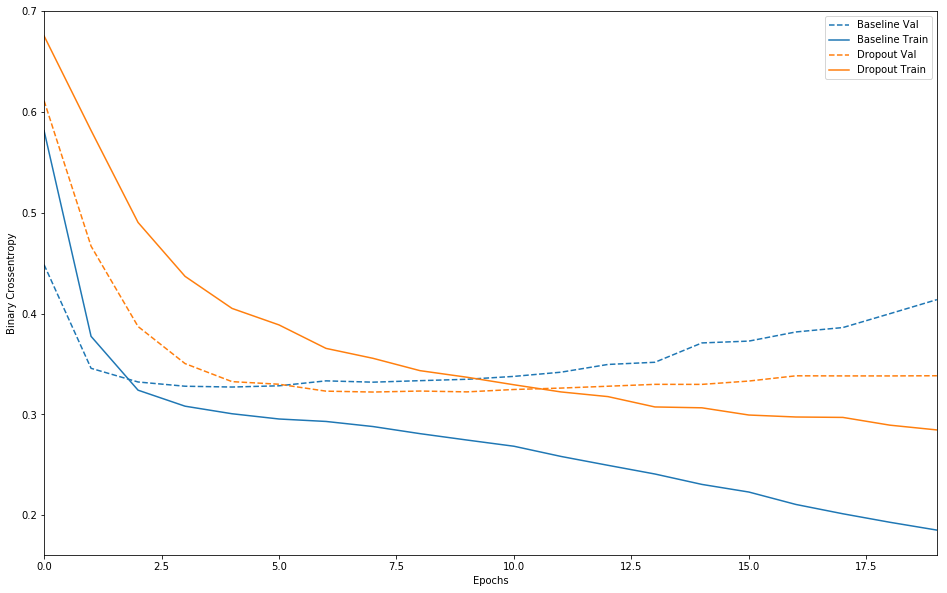

In [42]:
plot_history([('baseline', baseline_history),
              ('dropout', dropout_history)])